Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.8713 - loss: 0.4372 - val_accuracy: 0.9583 - val_loss: 0.1317
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9680 - loss: 0.1088 - val_accuracy: 0.9662 - val_loss: 0.1027
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9775 - loss: 0.0713 - val_accuracy: 0.9753 - val_loss: 0.0863
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9820 - loss: 0.0562 - val_accuracy: 0.9748 - val_loss: 0.0848
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9872 - loss: 0.0417 - val_accuracy: 0.9765 - val_loss: 0.0793
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9898 - loss: 0.0322 - val_accuracy: 0.9780 - val_loss: 0.0797
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9908 - loss: 0.0272 - val_accuracy: 0.9777 - val_loss: 0.0785
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9929 - loss: 0

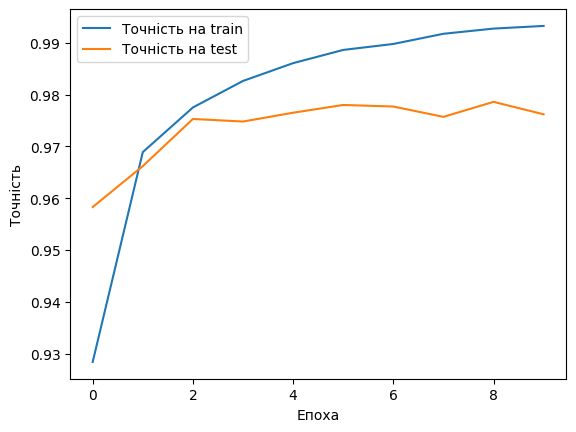

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


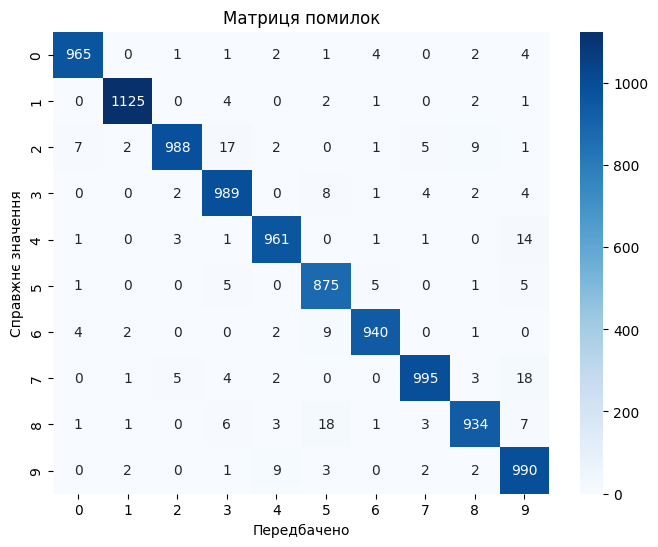

Звіт класифікації (precision, recall, F1-score):
              precision    recall  f1-score   support

           0     0.9857    0.9847    0.9852       980
           1     0.9929    0.9912    0.9921      1135
           2     0.9890    0.9574    0.9729      1032
           3     0.9621    0.9792    0.9706      1010
           4     0.9796    0.9786    0.9791       982
           5     0.9552    0.9809    0.9679       892
           6     0.9853    0.9812    0.9833       958
           7     0.9851    0.9679    0.9764      1028
           8     0.9770    0.9589    0.9679       974
           9     0.9483    0.9812    0.9644      1009

    accuracy                         0.9762     10000
   macro avg     0.9760    0.9761    0.9760     10000
weighted avg     0.9764    0.9762    0.9762     10000

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step


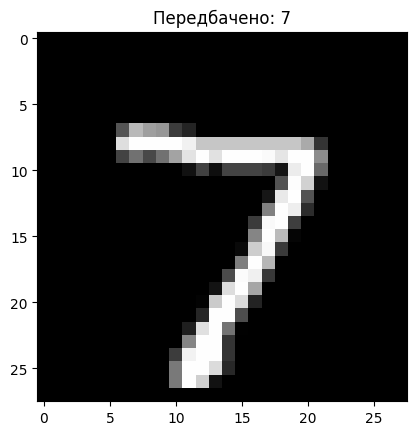

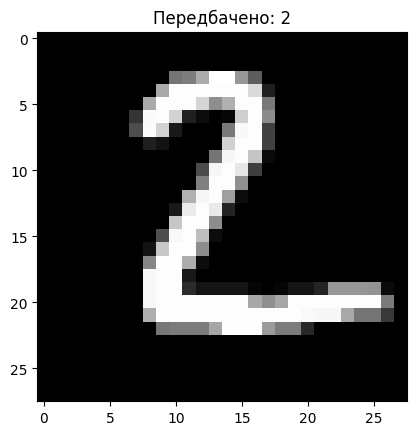

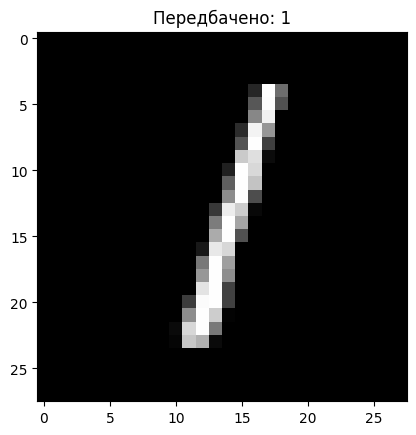

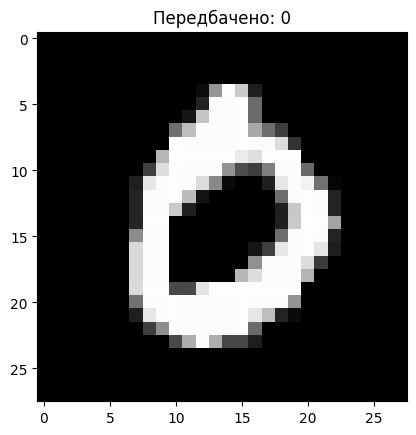

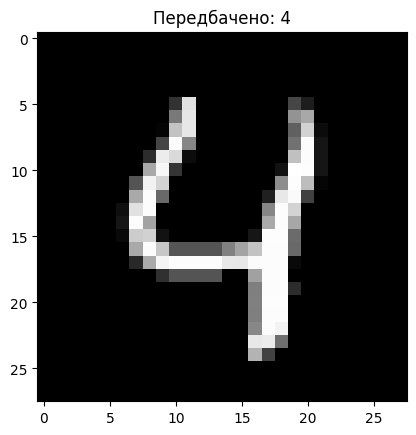

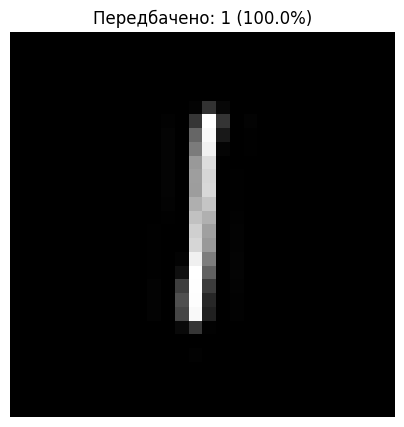

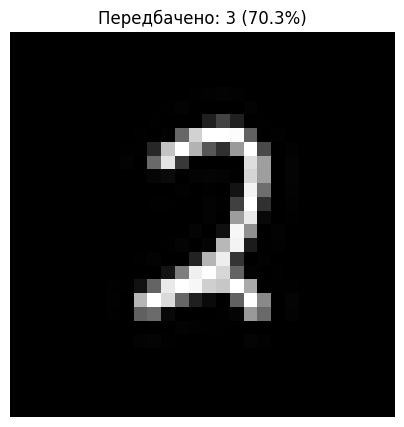

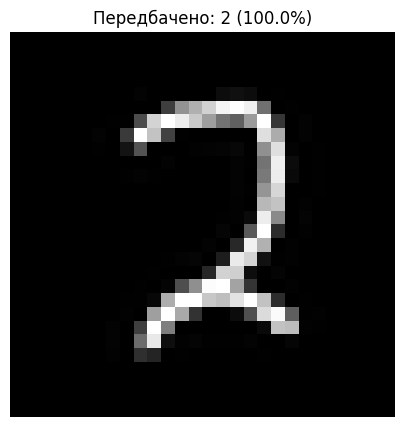

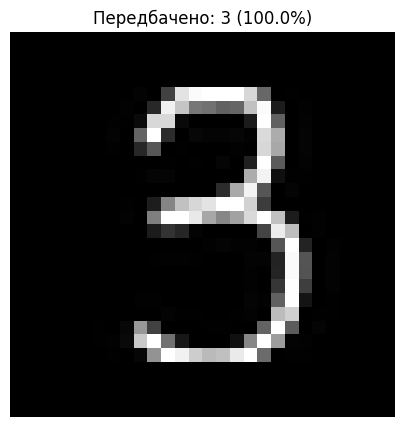

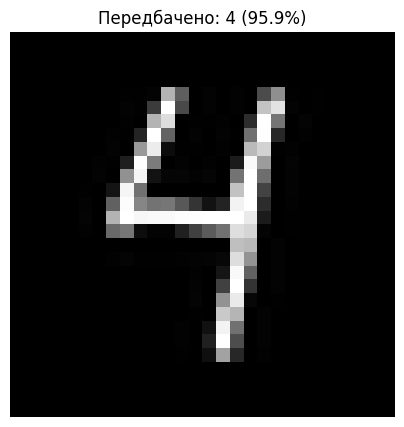

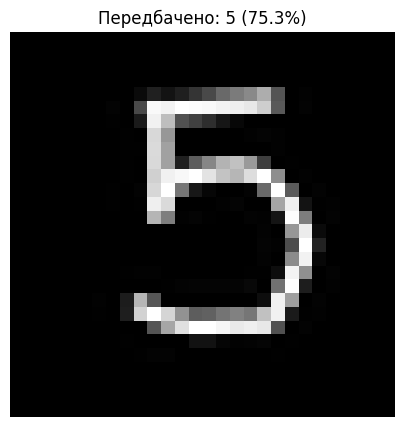

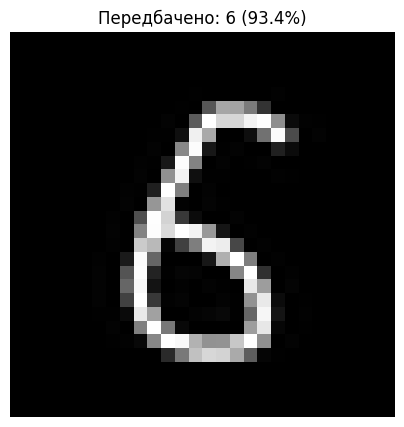

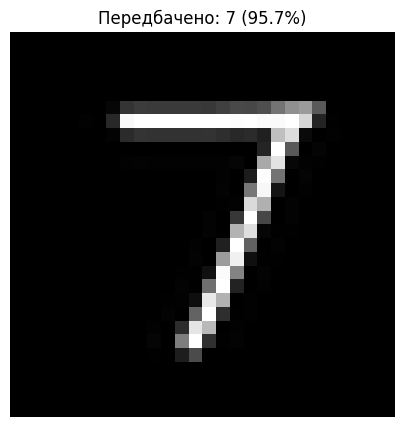

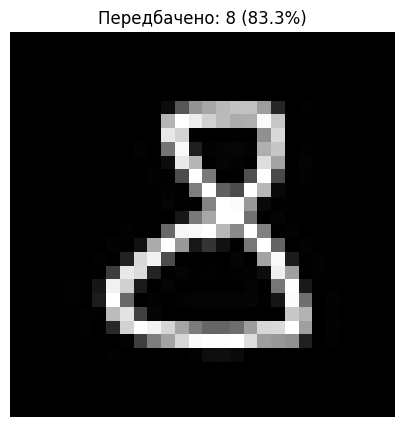

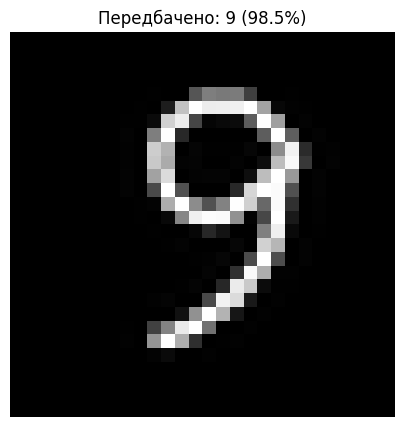

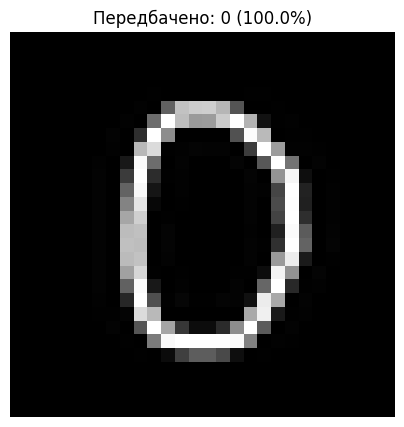

In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from PIL import Image
from google.colab import output
from IPython.display import display, HTML
import base64
import io

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)

model = keras.Sequential([
    layers.Input(shape=(784,)),
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

history = model.fit(
    x_train, y_train,
    epochs=10,
    batch_size=32,
    validation_data=(x_test, y_test)
)

loss, accuracy = model.evaluate(x_test, y_test)
print(f"\nТочність на тестових даних: {accuracy * 100:.2f}%")

plt.plot(history.history['accuracy'], label='Точність на train')
plt.plot(history.history['val_accuracy'], label='Точність на test')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.show()

y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Передбачено")
plt.ylabel("Справжнє значення")
plt.title("Матриця помилок")
plt.show()

print("Звіт класифікації (precision, recall, F1-score):")
print(classification_report(y_true, y_pred_classes, digits=4))

predictions = model.predict(x_test[:5])
for i in range(5):
 plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
 plt.title(f"Передбачено: {np.argmax(predictions[i])}")
 plt.show()

def recognize_custom_digit(image_array):
    image_normalized = image_array.astype("float32") / 255.0
    image_flat = image_normalized.reshape(1, 784)

    prediction = model.predict(image_flat, verbose=0)
    predicted_digit = np.argmax(prediction[0])
    confidence = prediction[0][predicted_digit] * 100

    plt.figure(figsize=(5, 5))
    plt.imshow(image_array, cmap='gray')
    plt.axis('off')
    plt.title(f"Передбачено: {predicted_digit} ({confidence:.1f}%)")
    plt.show()
    return predicted_digit, confidence


def preprocess_uploaded_image(uploaded_image):
    img_gray = uploaded_image.convert('L')

    img_gray.thumbnail((20, 20), Image.Resampling.LANCZOS)
    img_array = np.array(img_gray)

    img_28 = np.zeros((28, 28), dtype=np.uint8)
    h, w = img_array.shape
    y_offset = (28 - h) // 2
    x_offset = (28 - w) // 2
    img_28[y_offset:y_offset+h, x_offset:x_offset+w] = img_array

    return img_28


def analyze_drawn_digit():
    canvas_html = """
    <style>
      canvas {
        background: black;
        cursor: crosshair;
      }
    </style>
    <div style="text-align:center">
      <h3>Намалюй цифру (0–9)</h3>
      <canvas id="canvas" width="380" height="380"></canvas>
    </div>
    <script>
      const canvas = document.getElementById('canvas');
      const ctx = canvas.getContext('2d');
      ctx.lineWidth = 25;
      ctx.lineCap = 'round';
      ctx.strokeStyle = 'white';
      ctx.fillStyle = 'black';
      ctx.fillRect(0, 0, canvas.width, canvas.height);

      let drawing = false;

      canvas.addEventListener('mousedown', e => {
        // при початку малювання — очистити
        ctx.fillStyle = 'black';
        ctx.fillRect(0, 0, canvas.width, canvas.height);
        drawing = true;
        ctx.beginPath();
        ctx.moveTo(e.offsetX, e.offsetY);
      });

      canvas.addEventListener('mousemove', e => {
        if (drawing) {
          ctx.lineTo(e.offsetX, e.offsetY);
          ctx.stroke();
        }
      });

      canvas.addEventListener('mouseup', () => {
        drawing = false;
        const dataURL = canvas.toDataURL('image/png');
        google.colab.kernel.invokeFunction('notebook.save_canvas', [dataURL], {});
      });

      canvas.addEventListener('mouseout', () => drawing = false);
    </script>
    """
    display(HTML(canvas_html))

    def upload_drawn_digit(data_url):
        img_data = data_url.split(',')[1]
        img_bytes = base64.b64decode(img_data)
        image = Image.open(io.BytesIO(img_bytes))
        img_gray = image.convert('L')
        processed_image = preprocess_uploaded_image(img_gray)
        recognize_custom_digit(processed_image)

    output.register_callback('notebook.save_canvas', upload_drawn_digit)

analyze_drawn_digit()


